# Power Spectum

We consider a discrete 3D guassian field $\rho(\mathbf{x})$ where we denote $\mathbf{x} = (x_0, x_1, x_2)$. We can obtain the overdensity field $\delta(\mathbf{x})$ 

$$
\delta(x_0, x_1, z_2) = \frac{\rho(x_0, x_1, x_2) - \langle \rho(x_0, x_1, x_2) \rangle}{\langle \rho(x_0, x_1, x_2) \rangle}
$$

which is a zero mean field, where $\langle \rho(x_0, x_1, x_2) \rangle$ is the mean of the field. Let us assume looking at a Universe contained in a cubic volume with equal sides of length $L$, furtehrmore we imageine that the density field is periodic. We can then define the density field in terms of the inverse discrete furier transform as

$$
\delta(x_0, x_1, x_2) = \frac{1}{L^3} \sum_{k_0=0}^{L-1} \sum_{k_1=0}^{L-1} \sum_{k_2=0}^{L-1} \delta_k(k_0, k_1, k_2) e^{i k_0 x_0 + k_1 x_1 + k_2 x_2},
$$

which we write in a more compact form as

$$
\delta(\mathbf{x}) =  \frac{1}{L^3} \sum_{\mathbf{k}} \delta(\mathbf{k}) e^{i\mathbf{k}\cdot \mathbf{x}}.
$$

We call the $\sigma_k(\mathbf{k})$ the Fourier modes of the field, the vector $\mathbf{k}$ is the wavevector defined as

$$
\mathbf{k} = (k_0, k_1, k2) =  \frac{2\pi}{L} (x_0, x_1, x_2).
$$ 

The Fourier modes are related to the density field by the furier transform
$$
\delta(\mathbf{k}) = \sum_{\mathbf{x}} \delta(\mathbf{x}) e^{-i\mathbf{k}\cdot \mathbf{x}}
$$

where sum over all the grid points in the box.

## Autocorrelation Function

A commonly used measure of clustering is the second momment of the density field, which is also called autocorrelation function

$$
\xi(r) = \langle \delta(\mathbf{x}) \delta(\mathbf{x} + \mathbf{r}) \rangle.
$$

This means we sum over all pairs of points in the box which are separated by a distance $r$. Hence we can rewrite the autocorrelation function in the discrete setting as

$$
\xi(r) = \frac{1}{L^3} \sum_{\mathbf{x}} \delta(\mathbf{x}) \delta(\mathbf{x} + \mathbf{r}).
$$

The Power Spectrum is defined as the Fourier transform of the autocorrelation function

$$
P(k) = \sum_{\mathbf{x}} \xi(x) e^{-i\mathbf{k}\cdot \mathbf{x}}.
$$

I dont get the derivation of the power spectrum?

The power spectrum is 

$$
P(k) = \frac{1}{L^3} \langle | \delta(\mathbf{k}) |^2 \rangle.
$$

In [83]:
import jax.numpy as jnp
import jax
import matplotlib.pyplot as plt
import pyccl as ccl

(-0.5, 99.5, 99.5, -0.5)

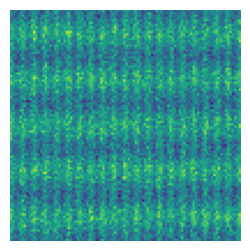

In [113]:
# Lets generate some 2D data
N = 100
N_half = N//2
coords = jnp.linspace(-1, 1, N)
x, y, z = jnp.meshgrid(coords, coords, coords)
rho = jnp.cos(5*jnp.pi*x) + jnp.sin(10*jnp.pi*y) + jnp.cos(20*jnp.pi*z)
rho = jax.random.normal(jax.random.PRNGKey(0), rho.shape) + rho
# Lets plot the data
fig, axs = plt.subplots(1, 1, figsize=(3, 3))
axs.imshow(rho[N_half], cmap='viridis')
axs.axis('off')

In [114]:
# computhe the overdensity
delta = (rho - rho.mean())/rho.mean()

# compute the fft
delta_k = jnp.fft.fftn(delta)

# shift the fft
delta_k = jnp.fft.fftshift(delta_k)

# we are only interested in the positive k
N_half = N//2
delta_k = delta_k[N_half:, N_half:, N_half:]


Text(0, 0.5, 'P(k)')

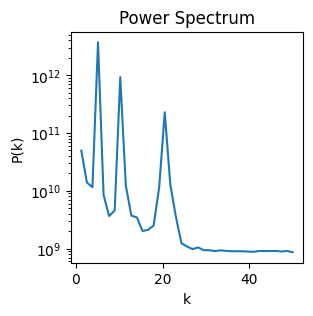

In [118]:
# compute the power spectrum
coords = jnp.linspace(0, N_half-1, N_half)
kx, ky, kz = jnp.meshgrid(coords, coords, coords)
k = jnp.sqrt(kx**2 + ky**2 + kz**2)

n_bins = 40
bin_index = jnp.digitize(k, jnp.linspace(0, N_half, n_bins))

power = jnp.zeros(n_bins).at[bin_index].add(jnp.abs(delta_k)**2)

power = power / (N**2)

# count the number of modes in each bin
n_modes = jnp.zeros(n_bins).at[bin_index].add(1)

# compute the average power
power = power / n_modes

x = jnp.linspace(0, N_half, n_bins)

# plot the power spectrum
fig, axs = plt.subplots(1, 1, figsize=(3, 3))
axs.plot(x, power)

axs.set_yscale('log')
axs.set_title('Power Spectrum')
axs.set_xlabel('k')	
axs.set_ylabel('P(k)')